In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.computational_tools import remesh
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read all experiments in the folder. Concatenete collections with "+" operator, which concateneta dictionary of experiments.

In [8]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Apr2022/R4', additional_subfolder='output') + \
     CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [ ]:
#ds.print_exps()

# Build custom figure layout with "get_axes"

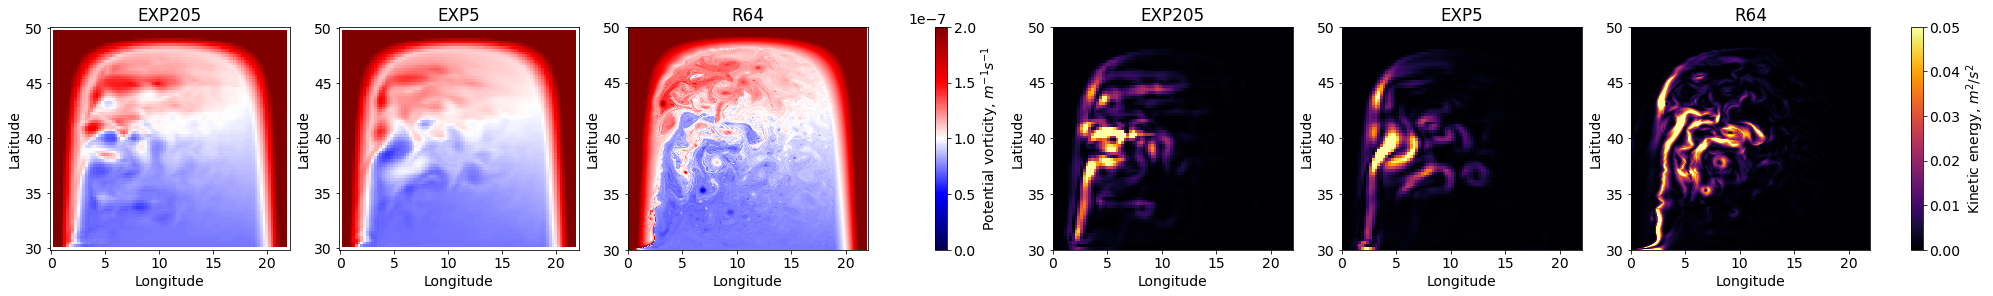

In [9]:
fig, ax = ds.get_axes(nfig=6, ncol=6)
ds.plot_PV(['EXP205', 'EXP5', 'R64'], ax=ax[:3]);
ds.plot_KE(['EXP205', 'EXP5', 'R64'], ax=ax[3:]);

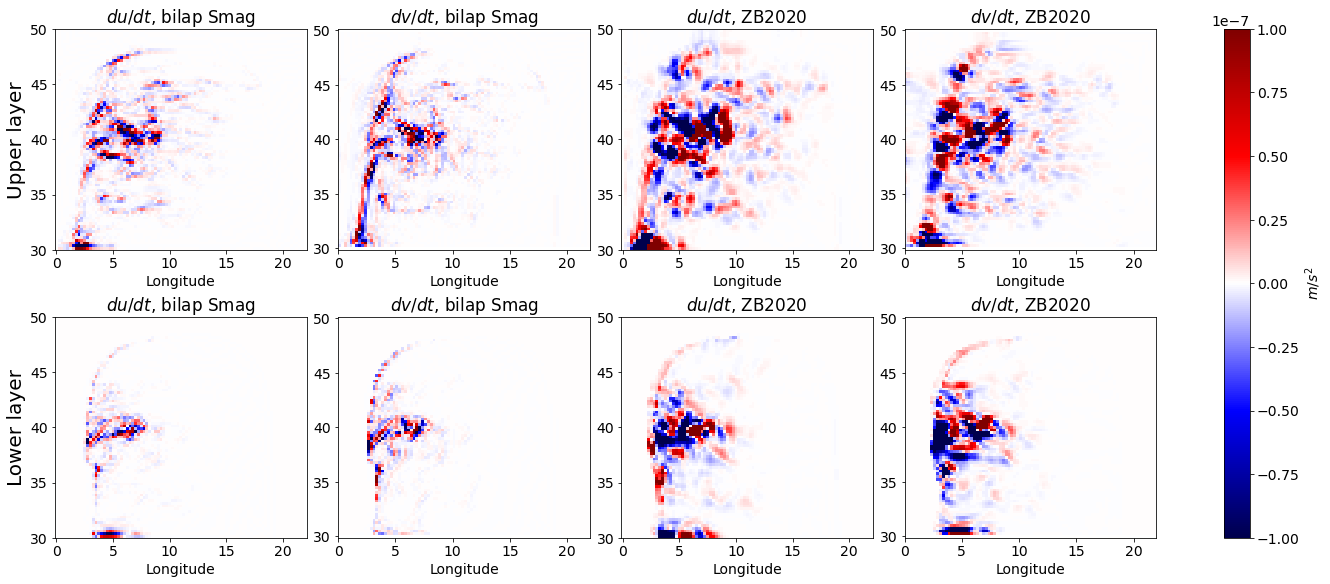

In [10]:
ds.plot_SGS('EXP205');

# Animate any plotter function in Time with decorator "animate"

In [11]:
%%time 
animate_function = ds.animate(ds.plot_PV, nfig=2, Time=range(-50,0), videoname='PV.mp4')
videoname = animate_function(['R8', 'R32'])

CPU times: user 36.9 s, sys: 1.49 s, total: 38.4 s
Wall time: 39.8 s


In [12]:
%%time
animate_function = ds.animate_celluloid(ds.plot_PV, nfig=2, Time=range(-50,0), videoname='PV_celluloid.mp4')
videoname = animate_function(['R8', 'R32'])

CPU times: user 36.8 s, sys: 699 ms, total: 37.5 s
Wall time: 37.8 s


In [157]:
animate_function = ds.animate(ds.pcolormesh, nfig=3, videoname='ssh.mp4')
videoname = animate_function('e', ['R4', 'R16', 'R64'], cmap='seismic')

In [180]:
animate_function = ds.animate(ds.plot_SGS, nfig=8, ncol=4, videoname='SGS.mp4')
videoname = animate_function('EXP205')

In [456]:
animate_function = ds.animate(ds.pcolormesh, nfig=3, videoname='u.mp4')
videoname = animate_function('u', ['R4', 'R16', 'R64'], cmap='seismic')

# Coarsegraining tools: remesh(input, target)

## Simple coarsegraining

Text(0.5, 1.0, 'Result-Target')

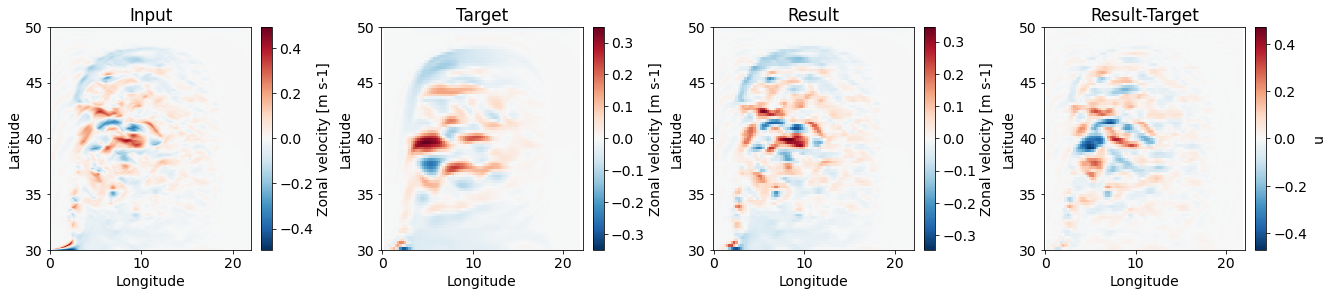

In [29]:
fig, ax = ds.get_axes(nfig=4, ncol=4)
input = ds['R64'].prog.u.isel(Time=-1,zl=0)
target = ds['R4'].prog.u.isel(Time=-1,zl=0)
result = remesh(input,target)
input.plot(ax=ax[0]); ax[0].set_title('Input')
target.plot(ax=ax[1]); ax[1].set_title('Target')
result.plot(ax=ax[2]); ax[2].set_title('Result')
(result-target).plot(ax=ax[3]); ax[3].set_title('Result-Target')

## Simple interpolation to fine mesh

Text(0.5, 1.0, 'Result-Target')

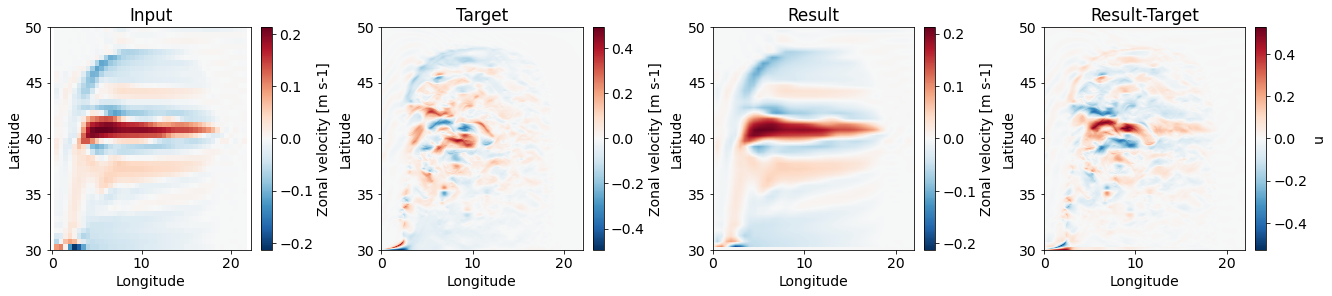

In [30]:
fig, ax = ds.get_axes(nfig=4, ncol=4)
input = ds['R2'].prog.u.isel(Time=-1,zl=0)
target = ds['R64'].prog.u.isel(Time=-1,zl=0)
result = remesh(input,target)
input.plot(ax=ax[0]); ax[0].set_title('Input')
target.plot(ax=ax[1]); ax[1].set_title('Target')
result.plot(ax=ax[2]); ax[2].set_title('Result')
(result-target).plot(ax=ax[3]); ax[3].set_title('Result-Target')

## U-points to V-points interpolation

Text(0.5, 1.0, 'Result-Target')

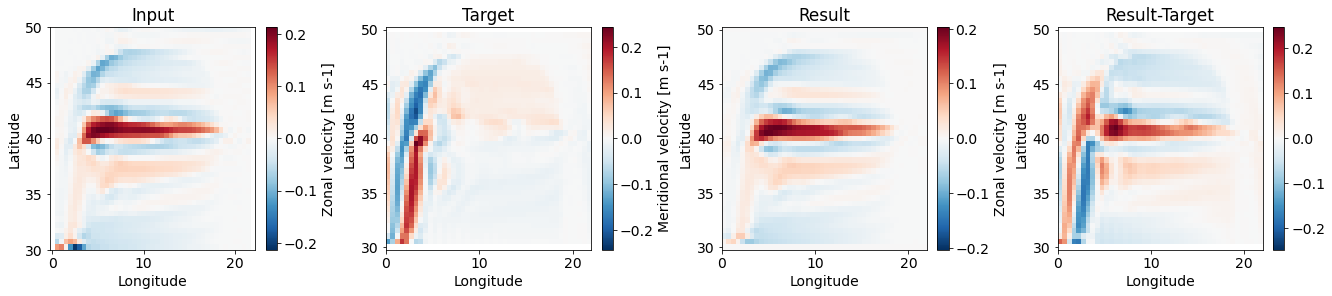

In [31]:
fig, ax = ds.get_axes(nfig=4, ncol=4)
input = ds['R2'].prog.u.isel(Time=-1,zl=0)
target = ds['R2'].prog.v.isel(Time=-1,zl=0)
result = remesh(input,target)
input.plot(ax=ax[0]); ax[0].set_title('Input')
target.plot(ax=ax[1]); ax[1].set_title('Target')
result.plot(ax=ax[2]); ax[2].set_title('Result')
(result-target).plot(ax=ax[3]); ax[3].set_title('Result-Target')

# Example of remeshing in the case of absolutely different xarrays
### Adjust interface height 4d array to coordinates of 2d array of coriolis parameter

In [8]:
remesh(ds['R64'].ave.e, ds['R4'].param.f)

<xarray.DataArray 'e' (Time: 243, zi: 3, yq: 81, xq: 89)>
dask.array<where, shape=(243, 3, 81, 89), dtype=float32, chunksize=(13, 3, 81, 89), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) float64 15.0 45.0 75.0 ... 7.215e+03 7.245e+03 7.275e+03
  * zi       (zi) float64 1.034e+03 1.036e+03 1.037e+03
  * xq       (xq) float64 0.0 0.25 0.5 0.75 1.0 ... 21.0 21.25 21.5 21.75 22.0
  * yq       (yq) float64 30.0 30.25 30.5 30.75 31.0 ... 49.25 49.5 49.75 50.0
Attributes:
    long_name:      Interface Height Relative to Mean Sea Level
    units:          m
    cell_methods:   area:mean zi:point yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT

# Remeshing the "experiment" instance

In [21]:
input = ds['R64']
target = ds['R4']
%time result = input.remesh(target)

CPU times: user 137 ms, sys: 8.71 ms, total: 145 ms
Wall time: 146 ms


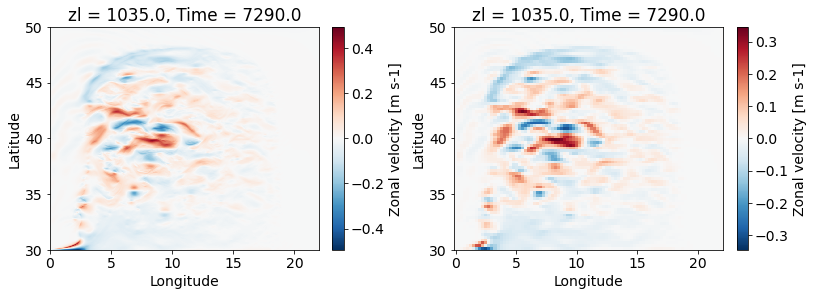

In [22]:
fig, ax = ds.get_axes(nfig=2,ratio=1.4)
input.u.isel(Time=-1,zl=0).plot(ax=ax[0])
result.u.isel(Time=-1,zl=0).plot(ax=ax[1])

# Adding coarsegrained experiment to the collection

In [150]:
%time ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

CPU times: user 5.52 ms, sys: 422 µs, total: 5.94 ms
Wall time: 5.45 ms


In [12]:
%%time
for coarse in ['R4', 'R8']:
    ds.remesh('R64', coarse, compute=True)

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8
CPU times: user 2min 52s, sys: 1min 23s, total: 4min 15s
Wall time: 42.3 s


In [20]:
%%time
animate_function = ds.animate(ds.plot_KE, nfig=3, ncol=3, videoname='Coarsegrain_KE.mp4');
videoname = animate_function(['R64_R4', 'R64_R8', 'R64']);

CPU times: user 5min 18s, sys: 1min 32s, total: 6min 51s
Wall time: 4min 51s


# Spectral tools

In [14]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [15]:
ds.remesh('R32', 'R4', compute=True)

Experiment R32 coarsegrained to R4 is created. Its identificator=R32_R4


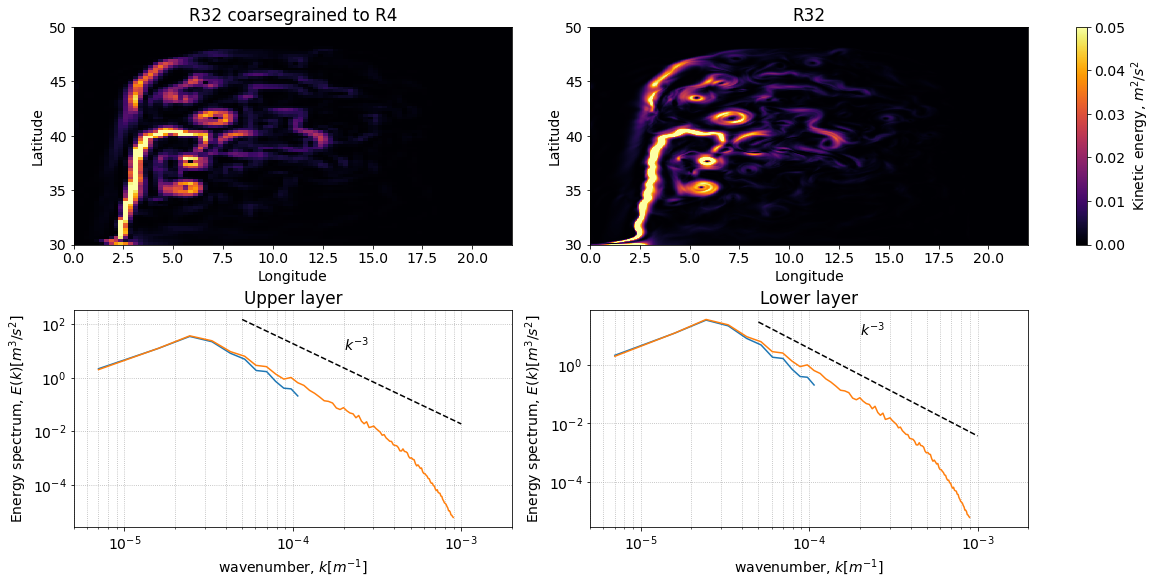

In [28]:
def plotter(ds, Time=-1, ax=None, use_colorbar=True):
    p = []
    p.extend(ds.plot_KE(['R32_R4', 'R32'], ax=ax[0:2], Time=Time, use_colorbar=use_colorbar))
    p.extend(ds.plot_KE_spectrum(['R32_R4', 'R32'], ax=ax[2:], Time=Time))
    return p
fig, ax = ds.get_axes(nfig=4, ncol=2, ratio=2)
p = plotter(ds, ax=ax);

In [30]:
animate_function = ds.animate_celluloid(plotter, nfig=4, ncol=2, ratio=2, videoname='KE_spectrum.mp4');
videoname = animate_function(ds);